In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation', con=engine)

engine.dispose()

In [3]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [4]:
no_nulls_df = education_df.copy()

for col in no_nulls_df.columns:
    no_nulls_df.loc[:, col] = no_nulls_df.loc[:, col].interpolate(limit_direction='both')
no_nulls_df.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

1) Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values

In [5]:
# Interquartile Range method for determining outliers for TOTAL_REVENUE and TOTAL_EXPENDITURE

# TOTAL_REVENUE
qR85, qR15 = np.percentile(no_nulls_df["TOTAL_REVENUE"], [85 ,15])
iqr_R = qR85 - qR15

threshold = 1.5
min_val_R = qR15 - (iqr_R*threshold)
max_val_R = qR85 + (iqr_R*threshold)
print("The score threshold for TOTAL_REVENUE is: {}".format(threshold))
print("Number of outliers for TOTAL_REVENUE is: {}".format(
    len((np.where((no_nulls_df["TOTAL_REVENUE"] > max_val_R) 
                | (no_nulls_df["TOTAL_REVENUE"] < min_val_R))[0]))
    ))

# TOTAL_EXPENDITURE
qE85, qE15 = np.percentile(no_nulls_df["TOTAL_EXPENDITURE"], [85 ,15])
iqr_E = qE85 - qE15

threshold = 1.5
min_val_E = qE15 - (iqr_E*threshold)
max_val_E = qE85 + (iqr_E*threshold)
print("The score threshold for TOTAL_EXPENDITURE is: {}".format(threshold))
print("Number of outliers for TOTAL_EXPENDITURE is: {}".format(
    len((np.where((no_nulls_df["TOTAL_EXPENDITURE"] > max_val_E) 
                | (no_nulls_df["TOTAL_EXPENDITURE"] < min_val_E))[0]))
    ))

The score threshold for TOTAL_REVENUE is: 1.5
Number of outliers for TOTAL_REVENUE is: 21
The score threshold for TOTAL_EXPENDITURE is: 1.5
Number of outliers for TOTAL_EXPENDITURE is: 25


2) If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them

In [6]:
winsorized_E = winsorize(no_nulls_df["TOTAL_EXPENDITURE"], (0.15, 0.15))
print(winsorized_E)

winsorized_R = winsorize(no_nulls_df["TOTAL_REVENUE"], (0.15, 0.15))
print(winsorized_R)

[ 2653798.  1652537.  3401580. ... 23352516. 23352516. 23352516.]
[ 2678885.  1644533.  3258079. ... 23766529. 23766529. 23766529.]


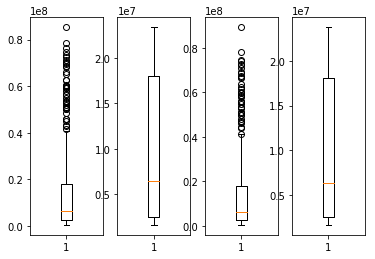

In [7]:
plt.subplot(1,4,1)
plt.boxplot(no_nulls_df["TOTAL_EXPENDITURE"])
plt.subplot(1,4,2)
plt.boxplot(winsorized_E)
plt.subplot(1,4,3)
plt.boxplot(no_nulls_df["TOTAL_REVENUE"])
plt.subplot(1,4,4)
plt.boxplot(winsorized_R);

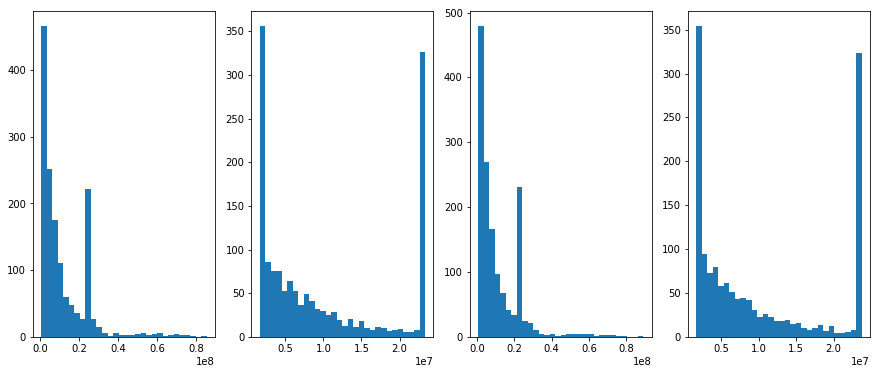

In [8]:
plt.figure(figsize=(15,6))
plt.subplot(1,4,1)
plt.hist(no_nulls_df["TOTAL_EXPENDITURE"], bins=30)
plt.subplot(1,4,2)
plt.hist(winsorized_E, bins=30)
plt.subplot(1,4,3)
plt.hist(no_nulls_df["TOTAL_REVENUE"], bins=30)
plt.subplot(1,4,4)
plt.hist(winsorized_R, bins=30);

In [9]:
print("The score threshold for TOTAL_EXPENDITURE is: {}".format(threshold))
print("Number of outliers for TOTAL_EXPENDITURE is: {}".format(
    len((np.where((winsorized_E > max_val_E) 
                | (winsorized_E < min_val_E))[0]))
    ))
print("Number of outliers for TOTAL_REVENUE is: {}".format(
    len((np.where((winsorized_R > max_val_R) 
                | (winsorized_R < min_val_R))[0]))
    ))

The score threshold for TOTAL_EXPENDITURE is: 1.5
Number of outliers for TOTAL_EXPENDITURE is: 0
Number of outliers for TOTAL_REVENUE is: 0


3) Create Variable by Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE. You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [10]:
no_nulls_df['BUDGET_DEFICIT'] = no_nulls_df["TOTAL_REVENUE"] - no_nulls_df["TOTAL_EXPENDITURE"]

In [11]:
# Interquartile Range method for determining outliers for BUDGET_DEFICIT

# BUDGET_DEFICIT
qB85, qB15 = np.percentile(no_nulls_df["BUDGET_DEFICIT"], [85 ,15])
iqr_B = qB85 - qB15

threshold = 1.5
min_val_B = qB15 - (iqr_B*threshold)
max_val_B = qB85 + (iqr_B*threshold)
print("The score threshold for BUDGET_DEFICIT is: {}".format(threshold))
print("Number of outliers for BUDGET_DEFICIT is: {}".format(
    len((np.where((no_nulls_df["BUDGET_DEFICIT"] > max_val_B) 
                | (no_nulls_df["BUDGET_DEFICIT"] < min_val_B))[0]))
    ))

The score threshold for BUDGET_DEFICIT is: 1.5
Number of outliers for BUDGET_DEFICIT is: 51


In [12]:
winsorized_B = winsorize(no_nulls_df["BUDGET_DEFICIT"], (0.15, 0.15))
print(winsorized_B)

[  25087.   77103. -143501. ...  414013.  414013.  414013.]


In [13]:
print("The score threshold for BUDGET_DEFICIT is: {}".format(threshold))
print("Number of outliers for BUDGET_DEFICIT is: {}".format(
    len((np.where((winsorized_B > max_val_E) 
                | (winsorized_B < min_val_E))[0]))
    ))

The score threshold for BUDGET_DEFICIT is: 1.5
Number of outliers for BUDGET_DEFICIT is: 0


4) Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [14]:
no_nulls_df['BUDGET_DEFICIT_2'] = winsorized_R - winsorized_E

In [15]:
# Interquartile Range method for determining outliers for BUDGET_DEFICIT_2

# BUDGET_DEFICIT_2
qB85, qB15 = np.percentile(no_nulls_df["BUDGET_DEFICIT_2"], [85 ,15])
iqr_B2 = qB85 - qB15

threshold = 1.5
min_val_B2 = qB15 - (iqr_B2*threshold)
max_val_B2 = qB85 + (iqr_B2*threshold)
print("The score threshold for BUDGET_DEFICIT_2 is: {}".format(threshold))
print("Number of outliers for BUDGET_DEFICIT_2 is: {}".format(
    len((np.where((no_nulls_df["BUDGET_DEFICIT_2"] > max_val_B2) 
                | (no_nulls_df["BUDGET_DEFICIT_2"] < min_val_B2))[0]))
    ))

The score threshold for BUDGET_DEFICIT_2 is: 1.5
Number of outliers for BUDGET_DEFICIT_2 is: 14


In [16]:
winsorized_B2 = winsorize(no_nulls_df["BUDGET_DEFICIT_2"], (0.15, 0.15))
print(winsorized_B2)

[  25087.   -8004. -143501. ...  414013.  414013.  414013.]


In [17]:
print("The score threshold for BUDGET_DEFICIT_2 is: {}".format(threshold))
print("Number of outliers for BUDGET_DEFICIT_2 is: {}".format(
    len((np.where((winsorized_B2 > max_val_B) 
                | (winsorized_B2 < min_val_B))[0]))
    ))

The score threshold for BUDGET_DEFICIT_2 is: 1.5
Number of outliers for BUDGET_DEFICIT_2 is: 0


5) Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [18]:
pd.DataFrame({"original_budget": no_nulls_df['BUDGET_DEFICIT'], "winsorized_budget1": winsorized_B,
              "winsorized_budget2": winsorized_B2}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,1.492000e+03,1492.000000,1492.000000
mean,-3.209622e+04,36243.601206,84508.053619
std,5.607748e+05,233471.172420,224295.575770
min,-5.487742e+06,-273298.000000,-196577.000000
25%,-1.368148e+05,-136814.750000,-79856.250000
50%,-5.355000e+02,-535.500000,-7596.500000
75%,1.876285e+05,187628.500000,414013.000000
max,3.897129e+06,414013.000000,414013.000000


The differences in the values are all pretty evident. The mean between the windsorization techniques vary greatly which show that the method used to cull outliers will have a noticeable difference in base statistics.

6) If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

It is probably best practice to manipulate the source data before removing outliers because the manipulation of the data may cause your outlier boundaries to change. Implementing a new feature that was calculated using culled outliers may still leave you with a dataset that has a few more outliers needing handling. Waiting to handle the outliers until the end leaves you with a dataset that more closely represents the source data.